In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [4]:
df['height_in_feet'] = df.height / 12
df.head()

,gender,height,height_in_feet
0,Male,73.847017,6.153918
1,Male,68.781904,5.731825
2,Male,74.110105,6.175842
3,Male,71.730978,5.977582
4,Male,69.881796,5.823483


In [5]:
df.describe()

,height,height_in_feet
count,10000.000000,10000.000000
mean,66.367560,5.530630
std,3.847528,0.320627
min,54.263133,4.521928
25%,63.505620,5.292135
50%,66.318070,5.526506
75%,69.174262,5.764522
max,78.998742,6.583229


Text(0, 0.5, 'Count')

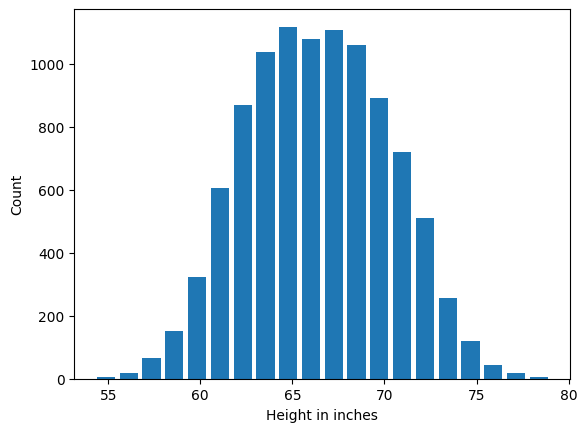

In [6]:
plt.hist(df.height, rwidth=0.8, bins = 20)
plt.xlabel('Height in inches')
plt.ylabel('Count')

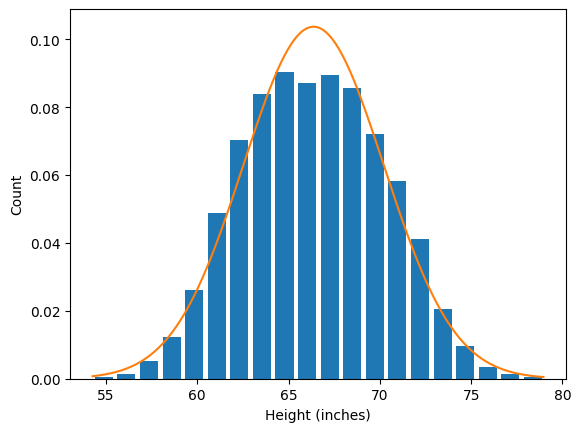

In [7]:
from scipy.stats import norm
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [8]:
np.arange(1, 10, 0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [9]:
min_limit = df.height.mean() - 3 * df.height.std()
max_limit = df.height.mean() + 3 * df.height.std()
min_limit, max_limit

(54.824975392479274, 77.91014411725271)

In [10]:
df[(df.height < min_limit) | (df.height > max_limit)]

,gender,height,height_in_feet
994,Male,78.095867,6.507989
1317,Male,78.462053,6.538504
2014,Male,78.998742,6.583229
3285,Male,78.528210,6.544018
3757,Male,78.621374,6.551781
6624,Female,54.616858,4.551405
9285,Female,54.263133,4.521928


In [11]:
df.shape

(10000, 3)

In [12]:
df = df[(df.height >= min_limit) & (df.height <= max_limit)]
df.shape

(9993, 3)

# Exercise

In [13]:
df2 = pd.read_csv('./bhp.csv')
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [14]:
min_limit2, max_limit2 = df2.price_per_sqft.quantile([0.001, 0.999])
min_limit2, max_limit2

(1366.184, 50959.36200000098)

In [15]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [16]:
df2.shape

(13200, 7)

In [17]:
df3 = df2[(df2.price_per_sqft >= min_limit2) & (df2.price_per_sqft <= max_limit2)]
df3.shape

(13172, 7)

In [18]:
min_limit3 = df3.price_per_sqft.mean() - 4 * df3.price_per_sqft.std()
max_limit3 = df3.price_per_sqft.mean() + 4 * df3.price_per_sqft.std()
min_limit3, max_limit3

(-9900.429065502582, 23227.73653589432)

In [19]:
df4 = df3[(df3.price_per_sqft >= min_limit3) & (df3.price_per_sqft <= max_limit3)]
df4.shape

(13047, 7)

Text(0, 0.5, 'Count')

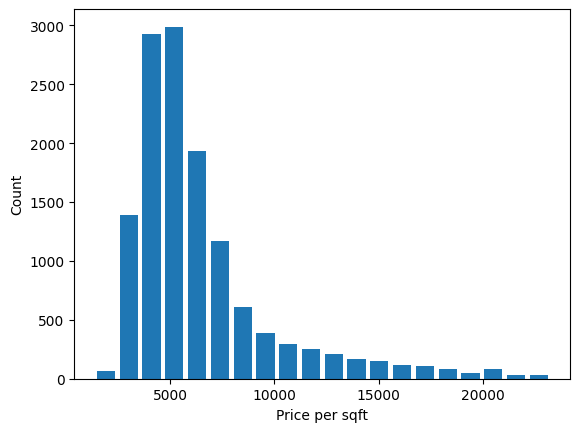

In [20]:
plt.hist(df4.price_per_sqft, bins = 20, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

In [21]:
import numpy as np
from scipy.stats import norm

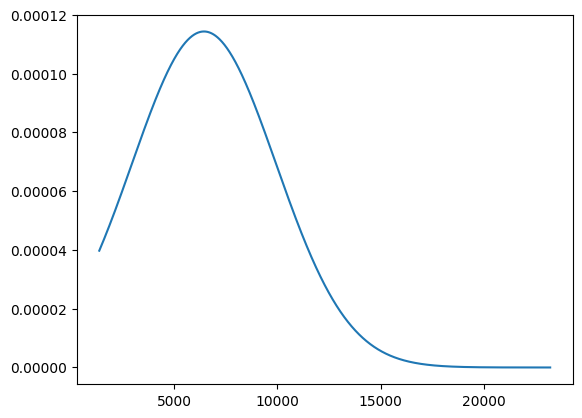

In [22]:
rang = np.arange(df4.price_per_sqft.min(), df4.price_per_sqft.max(), 0.1)
plt.plot(rang, norm.pdf(rang, df4.price_per_sqft.mean(), df4.price_per_sqft.std()))

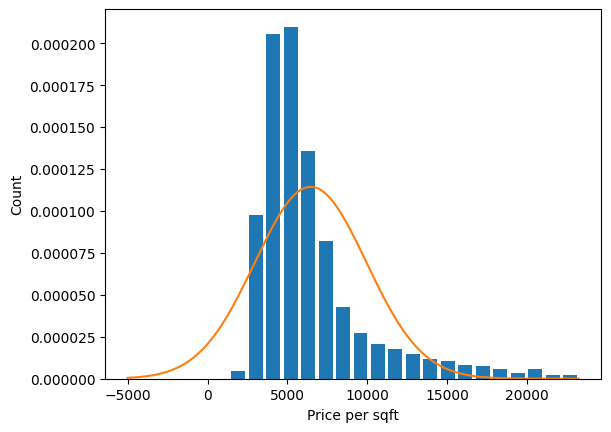

In [32]:
plt.hist(df4.price_per_sqft, bins = 20, rwidth=0.8, density = True)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

rang = np.arange(-5000, df4.price_per_sqft.max(), 100)
plt.plot(rang, norm.pdf(rang, df4.price_per_sqft.mean(), df4.price_per_sqft.std()))

In [24]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [25]:
df3.shape

(13172, 7)

In [26]:
df4.shape

(13047, 7)

In [27]:
df3['z_score'] = (df3.price_per_sqft - df3.price_per_sqft.mean()) / df3.price_per_sqft.std()
df3.sample(10)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7956\1170454528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['z_score'] = (df3.price_per_sqft - df3.price_per_sqft.mean()) / df3.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
7658,Hosur Road,3 BHK,1590.0,2.0,126.00,3,7924,0.304356
10070,Hoskote,2 BHK,1065.0,2.0,28.50,2,2676,-0.962964
725,Ramagondanahalli,2 BHK,1235.0,2.0,52.04,2,4213,-0.591799
8366,Kanakpura Road,3 BHK,1100.0,3.0,56.57,3,5142,-0.367459
11570,other,2 BHK,1000.0,2.0,45.00,2,4500,-0.522493
2070,Basavangudi,3 BHK,2350.0,3.0,300.00,3,12765,1.473392
8121,Old Madras Road,4 Bedroom,3900.0,4.0,175.00,4,4487,-0.525632
10817,Ambedkar Nagar,3 BHK,1852.0,4.0,122.00,3,6587,-0.018511
9723,other,4 BHK,4500.0,3.0,225.00,4,5000,-0.401750
10083,other,3 BHK,1864.0,3.0,115.00,3,6169,-0.119452


In [28]:
df3[df3.z_score > 4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [29]:
df3[df3.z_score < -4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score


In [30]:
df5 = df3[(df3.z_score <= 4) & (df3.z_score >= -4)]
df5.shape

(13047, 8)

In [31]:
df4.shape

(13047, 7)